In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset

In [2]:
df = pd.read_csv("./datasets/SMSSpamCollection",sep='\t',names=["target","text"])    

In [3]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
y = df["target"]
x = df["text"]

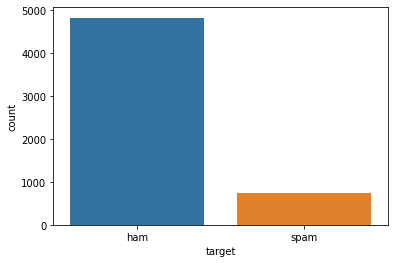

In [5]:
sns.countplot(x = y);

In [6]:
y.value_counts()

ham     4825
spam     747
Name: target, dtype: int64

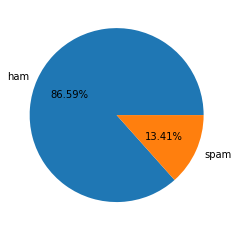

In [7]:
plt.pie(y.value_counts(),labels=y.value_counts().index,autopct='%2.2f%%');

In [8]:
# pip install wordcloud pillow -U

### Separate the ham and spam messages

In [9]:
# x,y

In [10]:
ham = x[y=='ham']
spam = x[y=='spam']

In [11]:
spam

2       Free entry in 2 a wkly comp to win FA Cup fina...
5       FreeMsg Hey there darling it's been 3 week's n...
8       WINNER!! As a valued network customer you have...
9       Had your mobile 11 months or more? U R entitle...
11      SIX chances to win CASH! From 100 to 20,000 po...
                              ...                        
5537    Want explicit SEX in 30 secs? Ring 02073162414...
5540    ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547    Had your contract mobile 11 Mnths? Latest Moto...
5566    REMINDER FROM O2: To get 2.50 pounds free call...
5567    This is the 2nd time we have tried 2 contact u...
Name: text, Length: 747, dtype: object

In [12]:
ham = ' '.join(ham)
spam = ' '.join(spam)

In [13]:
len(ham)

349727

In [14]:
len(spam)

104333

In [15]:
vocablury = set(spam)
vocablury = set(ham)

In [16]:
from wordcloud import WordCloud

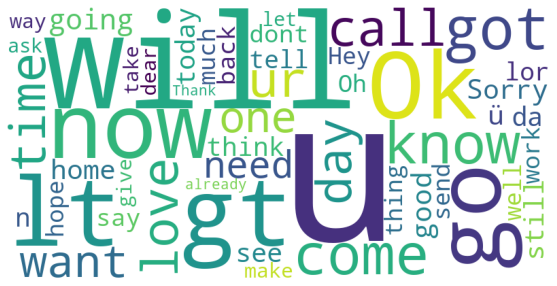

In [17]:
# Generate the word cloud
word_notSpam = WordCloud(width=800, height=400, background_color="white",max_words=50).generate(ham)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(word_notSpam)
plt.axis("off")
plt.show()

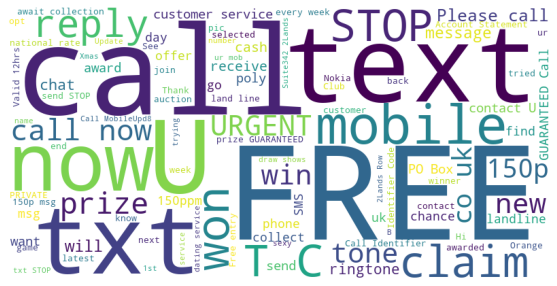

In [18]:
# Generate the word cloud
word_Spam = WordCloud(width=800, height=400, background_color="white",max_words=100).generate(spam)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(word_Spam)
plt.axis("off")  
plt.show()

In [19]:
# word_notSpam.words_
# word_Spam.words_

### Data Preparation

In [20]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag

In [21]:
sent = "Hello friends! How are you? I like Python Programming"

In [22]:
tok1 = word_tokenize(sent)

In [23]:
tok1

['Hello',
 'friends',
 '!',
 'How',
 'are',
 'you',
 '?',
 'I',
 'like',
 'Python',
 'Programming']

In [24]:
tokens1 = word_tokenize(ham)

In [25]:
# tokens1

In [26]:
# remove Punctuation

In [27]:
tokens2 = [token for token in tokens1 if token.isalpha() or token.isdigit()]

In [28]:
# tokens2

In [29]:
tok2 = [token for token in tok1 if token.isalpha() or token.isdigit()]

In [30]:
print(tok2)

['Hello', 'friends', 'How', 'are', 'you', 'I', 'like', 'Python', 'Programming']


In [31]:
swords = stopwords.words('english')
tokens3 = [token.lower() for token in tokens2 if token.lower() not in swords]

In [32]:
# print(tokens3)

In [33]:
swords = stopwords.words('english')
tok3 = [token.lower() for token in tok2 if token.lower() not in swords]

In [34]:
print(tok3)

['hello', 'friends', 'like', 'python', 'programming']


In [35]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [36]:
#remove the affixes

In [37]:
tokens4 = [ps.stem(token) for token in tokens3]

In [38]:
# print(tokens4)

In [39]:
tok4 = [ps.stem(token) for token in tok3]

In [40]:
print(tok4)

['hello', 'friend', 'like', 'python', 'program']


## Function

In [41]:
swords = stopwords.words('english')
def preprocessing(text):
    text1 = word_tokenize(text)
    text2 = [token for token in text1 if token.isalpha()]
    tokens3 = [ps.stem(token.lower()) for token in text2 if token.lower() not in swords]
    return tokens3

x.apply(preprocessing)

0       [go, jurong, point, crazi, avail, bugi, n, gre...
1                            [ok, lar, joke, wif, u, oni]
2       [free, entri, wkli, comp, win, fa, cup, final,...
3           [u, dun, say, earli, hor, u, c, alreadi, say]
4            [nah, think, goe, usf, live, around, though]
                              ...                        
5567    [time, tri, contact, u, pound, prize, claim, e...
5568                       [ü, b, go, esplanad, fr, home]
5569                                [piti, mood, suggest]
5570    [guy, bitch, act, like, interest, buy, someth,...
5571                                   [rofl, true, name]
Name: text, Length: 5572, dtype: object

## TF_IDF

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [43]:
tfidf = TfidfVectorizer(analyzer=preprocessing)
x_new = tfidf.fit_transform(x)
x_new.shape   # rows , unique word in whole dataset

(5572, 5925)

In [44]:
tfidf.get_feature_names_out()

array(['aa', 'aah', 'aaniy', ..., 'zyada', 'é', 'ü'], dtype=object)

In [45]:
len(tfidf.get_feature_names_out())

5925

### Cross validation

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train , x_test , y_train , y_test = train_test_split(x_new, y, random_state=0)

In [48]:
x_train.shape

(4179, 5925)

In [49]:
x_test.shape

(1393, 5925)

### Build the SVM Model

In [50]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score ,classification_report
svm = SVC(kernel='linear')
svm.fit(x_train, y_train)

SVC(kernel='linear')

### Performance Evaluation

In [51]:
y_pred = svm.predict(x_test)
accuracy_score(y_test,y_pred)

0.9827709978463748

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay

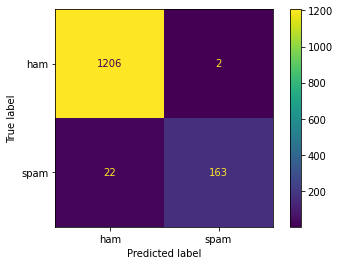

In [53]:
# Confusion matrix

ConfusionMatrixDisplay.from_predictions(y_test,y_pred);

In [54]:
# Classification report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1208
        spam       0.99      0.88      0.93       185

    accuracy                           0.98      1393
   macro avg       0.98      0.94      0.96      1393
weighted avg       0.98      0.98      0.98      1393



### Prediction on unknown messages

In [58]:
with open("./datasets/sample.csv","r") as f:
    data = f.readlines()
    
data

['Ok lar i double check wif da hair dresser already he said wun cut v short. He said will cut until i look nice.,,\n',
 'As a valued customer, I am pleased to advise you that following recent review of your Mob No. you are awarded with a Â£1500 Bonus Prize, call 09066364589\n',
 '"Today is ""song dedicated day.."" Which song will u dedicate for me? Send this to all ur valuable frnds but first rply me...",,\n']

In [56]:
x_new = tfidf.transform(data).toarray()
x_new

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [57]:
svm.predict(x_new)

array(['ham', 'spam', 'ham'], dtype=object)